In [1]:
import qiskit as q 
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram

from matplotlib import style
style.use("dark_background")

statevector_simulator = q.Aer.get_backend("statevector_simulator")
qasm_sim = q.Aer.get_backend("qasm_simulator")

def do_job(circuit):
    result = q.execute(circuit, backend= statevector_simulator).result()
    statevec = result.get_statevector()
    
    n_qubits = circuit.n_qubits
    
    circuit.measure([i for i in range(n_qubits)], [i for i in range(len(circuit.clbits))])
    
    qasm_job = q.execute(circuit, backend= qasm_sim, shots = 1024).result()
    counts = qasm_job.get_counts()
    return statevec, counts

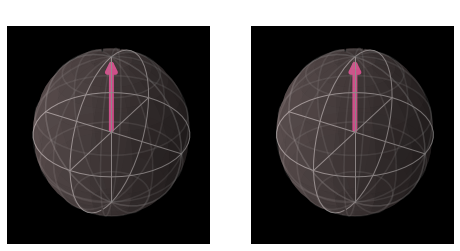

In [2]:
circuit = q.QuantumCircuit(2, 2)
statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)

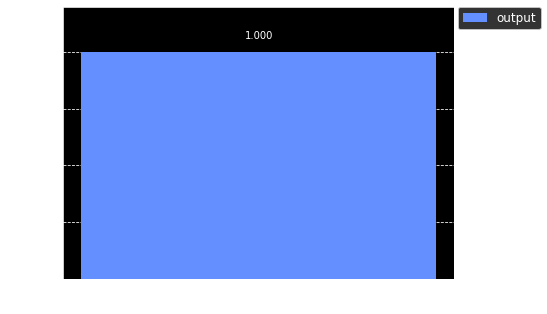

In [3]:
plot_histogram([counts], legend=['output'])

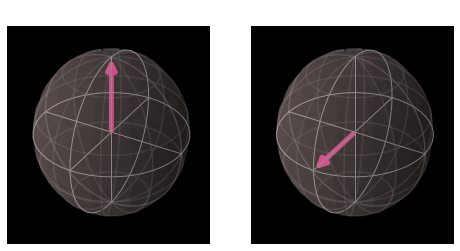

In [4]:
circuit = q.QuantumCircuit(2, 2)
circuit.h(1)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

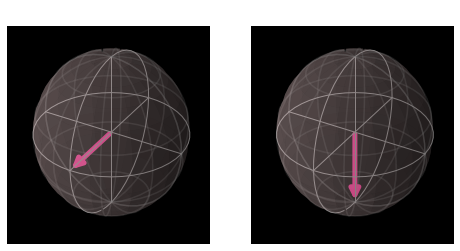

In [5]:
circuit = q.QuantumCircuit(2, 2)
circuit.h(0)
#circuit.cx(0, 1)
circuit.x(1)
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

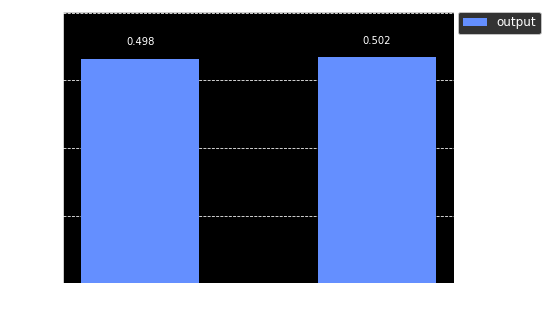

In [6]:
plot_histogram([counts], legend= ['output'])

In [7]:
circuit = q.QuantumCircuit(3, 3)

circuit.h(0)
circuit.h(1)
circuit.ccx(0, 1, 2)

#statevec, counts = do_job(circuit)
#plot_bloch_multivector(statevec)

circuit.draw()

┌───┐     
q_0: |0>┤ H ├──■──
        ├───┤  │  
q_1: |0>┤ H ├──■──
        └───┘┌─┴─┐
q_2: |0>─────┤ X ├
             └───┘
 c_0: 0 ══════════
                  
 c_1: 0 ══════════
                  
 c_2: 0 ══════════

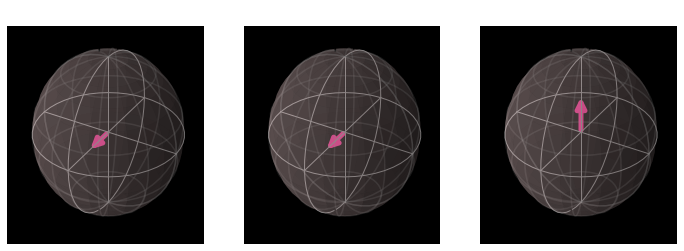

In [8]:
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

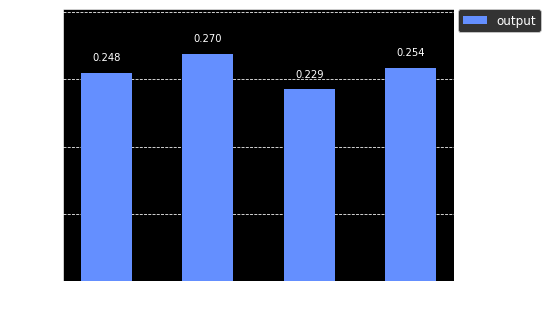

In [9]:
plot_histogram([counts], legend=['output'])

In [10]:
circuit = q.QuantumCircuit(3, 1)

circuit.h(0)
circuit.h(1)
circuit.ccx(0, 1, 2)

circuit.measure([2], [0])
circuit.draw()

┌───┐        
q_0: |0>┤ H ├──■─────
        ├───┤  │     
q_1: |0>┤ H ├──■─────
        └───┘┌─┴─┐┌─┐
q_2: |0>─────┤ X ├┤M├
             └───┘└╥┘
 c_0: 0 ═══════════╩═

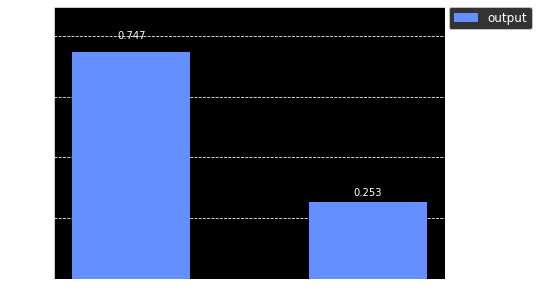

In [11]:
qasm_job = q.execute(circuit, backend=qasm_sim, shots = 1024).result()
counts = qasm_job.get_counts()
plot_histogram([counts], legend=['output'])

In [12]:
# Rotations


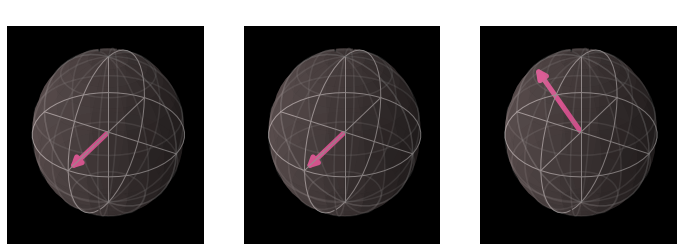

In [13]:
import math
circuit = q.QuantumCircuit(3, 3)

circuit.h(0)
circuit.h(1)
circuit.rx(math.pi/4, 2)
# OR
#circuit.x(2)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

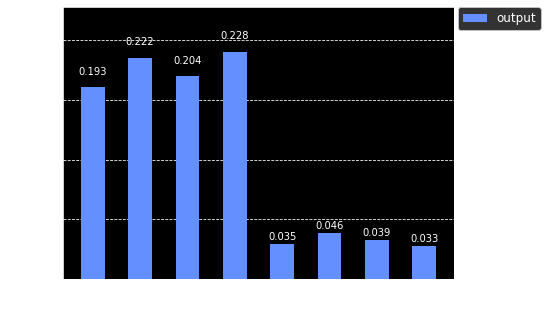

In [14]:
plot_histogram([counts], legend=['output'])

In [15]:
circuit = q.QuantumCircuit(3, 1)

circuit.h(0)
circuit.h(1)
circuit.rx(math.pi/4, 2)

circuit.measure([2], [0])
circuit.draw()

┌───┐       
q_0: |0>───┤ H ├───────
           ├───┤       
q_1: |0>───┤ H ├───────
        ┌──┴───┴───┐┌─┐
q_2: |0>┤ Rx(pi/4) ├┤M├
        └──────────┘└╥┘
 c_0: 0 ═════════════╩═

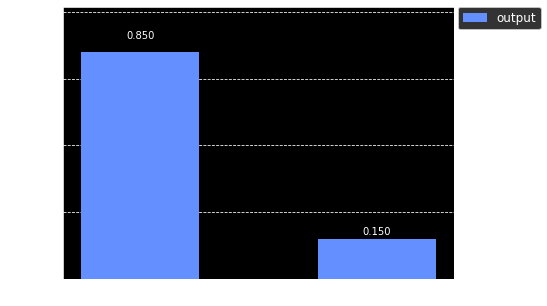

In [16]:
qasm_job = q.execute(circuit, backend=qasm_sim, shots = 1024).result()
counts = qasm_job.get_counts()
plot_histogram([counts], legend=['output'])